<b>Binary Add Operator (addition of 2 qubits)</b>

To start creating the circuit that will do this basic binary addition, we will do an import of the packages our code needs to run it.

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram 

Now, we will create the Quantum Circuit with 2 qubits that will act as the inputs of the circuit (addition of qubit 0 and qubit 1), and we will have 2 qubits that act as the outputs, because the basic addition of bits with size 1 will result on a number of 2 bits (only for the case when 1+1 = 10).

In [2]:
add_operator = QuantumCircuit(4,2) # we indicate the circuit has 4 qubits (2 for input and 2 for output) and we have 2 classical bits obtained from the collapsing and measuring the state of the qubits

Now we can start placing quantum gates, in order to obtain a quantum circuit that can add 2 qubits. The result of the operation will be a state that will collapse and it will be measured in order to obtain 2 classical bits, and that bits will have the result.
We will split our circuit in 3 parts:    
  
      - First of all, we will prepare the qubits to be in the state we want. For example, if we want to do 1 + 0, and assuming that each qubit starts in state |0> (100% of prob to obtain classical bit 0 when measuring), we have to change the state of the first qubit, so we will place a X gate on the first qubit to flip its state.  
        
      - The second part of the circuit will contain the operation gates that will be changing the state of that pair of output qubits, depending on the state we have prepared previously in that pair of input qubits, so we can call it the core of the circuit, the part that does the addition of this pair of qubits.  
        
      - Finally, we will have the measurement part. Here the output qubits will collapse and we will measure it to see which pair of bits we obtain from the addition.

For the first part of the circuit, we know that we will have to use X gates on those qubits we want to flip to state |1>. For the second part, we will have to use some gates that put that pair of output qubits in some state depending on the pair of input qubits. Here we have all possible inputs and the addition on those pair of inputs:  
   
0+0 = 00  
0+1 = 01  
1+0 = 01  
1+1 = 10  
  
We can see that, the first case is the same: we don't need any gate to transform output qubits.
   
For the second and third case, we will need a gate that, if qubit 0 or 1 is in state |1>, then qubit 3 (least significative bit of output) flips to state |1>, too. This gate is called the CNOT gate, a gate that has a control qubit, and if control qubit is 1, then the target qubit flips with an X gate (that's why we call it CNOT, but it's equivalent to CX), and otherwise remains in the same state.  
  
The last state is covered with a double CNOT, CCX, that has 2 control qubits (in our case, our control qubits will be the pair of input qubits), and if ALL 2 are in state |1>, then qubit 2 (most significative qubit of output pair) will flip its state, and otherwise will remain the same state.

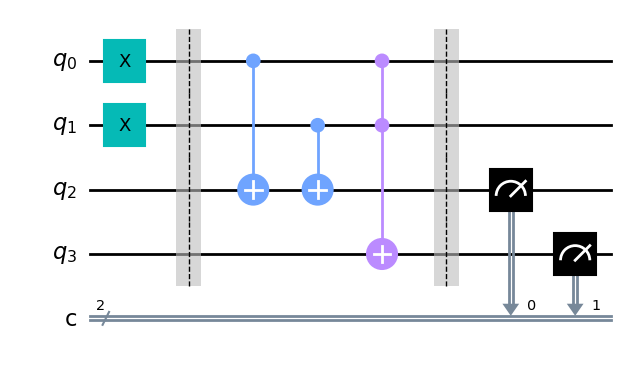

In [3]:
'''We will use for the example the addition of 1 + 1'''
add_operator.x(0)
add_operator.x(1)
add_operator.barrier()
add_operator.cx(0,2)
add_operator.cx(1,2)
add_operator.ccx(0,1,3)
add_operator.barrier()
add_operator.measure(2, 0)
add_operator.measure(3, 1)
add_operator.draw(output='mpl')

Now that we have the circuit, we are ready to assemble and execute it in the Aer simulator to see the results. 

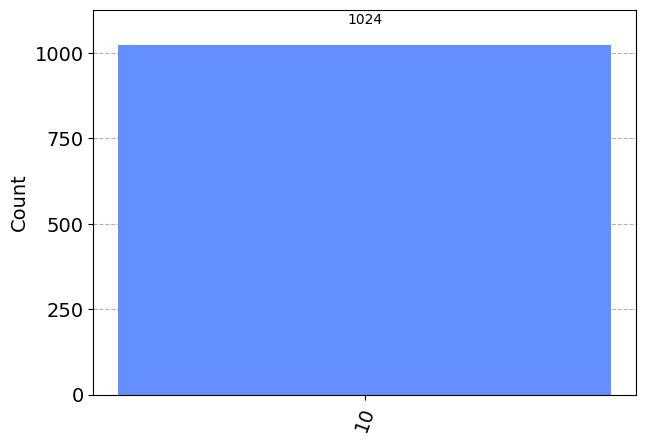

In [4]:
simulator = Aer.get_backend('aer_simulator')
qobj = assemble(add_operator)
count = simulator.run(qobj).result().get_counts()
plot_histogram(count)

And here we can see that the simulator returns a 100% of chance to obtain a 10 from output qubits when measurement and for our specific case of 1+1, so it works perfectly!  
  
If we wish to test other combinations of input values, we only have to place different X gates at the first part of the circuit and make all possible states (in our case with 2 qubits there are 4 possible inputs).